# DVI Assignment 2

<img src = "https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif">

<h1><center>Work Integrated Learning Programmes Division<br>
M.Tech (Data Science and Engineering)<br> Data Visualization And Interpretation (DSECL ZG555))<br>
Second Semester, 2021-22
</center></h1>

<h2><center>Assignment 2 – PS1 [Weightage 13%]</center></h2>

<ol>
  <li>Do not change the name of the data file that is shared with the problem statement.</li>
  <li>If intermediate data files are created, retain in the present working directory and attach them during submission.</li>
  <li>Retain the data file in the same directory as that of this workbook.</li>
  <li>Retain the Visualizations that is produced in the file. Don't clear them away.</li>
  <li>All the visuals should adhere to the visualization principles learnt in the Course and must be presentation ready. Most effective visuals would fetch maximum  credits</li>
  <li>Submissions done via means other than CANAVAS will strictly be NOT graded.</li>
</ol>

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>

<h2>Group No: (mention your group number here)</h2>

<table>
  <tr>
    <th>Full Name</th>
    <th>BITS ID</th>
  </tr>
  <tr>
    <td>VARINDER SINGH</td>
    <td>2021fc04070@wilp.bits-pilani.ac.in</td>
  </tr>
  <tr>
    <td>BANDARU RAJA SEKHAR</td>
    <td>2021fc04074@wilp.bits-pilani.ac.in</td>
  </tr>
  <tr>
    <td>MIKHIL. P.A.</td>
    <td>2021fc04326@wilp.bits-pilani.ac.in</td>
  </tr>
</table>

##  Download and Prep the Data: 1 Marks

<h4>Import the libraries needed</h4>

In [58]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<h4> Load data and store in dataframe </h4>

In [59]:
df = pd.read_csv("dvi-a2-ps1-data.csv")
df.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [60]:
# Cleaning column: Value 
df['Value'] = df['Value'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)

# Cleaning column: Wage 
df['Wage'] = df['Wage'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)

# Cleaning column: Release Clause 
df['Release Clause'] = df['Release Clause'].fillna(0)
df['Release Clause'] = df['Release Clause'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)

In [61]:
#Dropping duplicates and unwanted column - "Unnamed: 0"
df = df.drop(["Unnamed: 0"], axis = 1)
df.drop_duplicates(keep='last').reset_index(inplace = True)
col = df.describe().columns
col

Index(['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

<h4>Find out  what type of variable you are dealing with. This will help you find the right visualization method for that variable.</p>

- Data-type present in the dataset are of **String(Object), Float and Int.**

- The columns like-Weight, Height, Value, Overall and Potential, etc are having continuous data and columns like- Country, Club, Position, etc are having Nominal data.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  int64  
 11  Wage                      18207 non-null  int64  
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

# Visualisation Questions - 2 X 5 = 10 Marks

### Question 1
<h4>Fill the missing value for the continous variables with Mean(average) for proper data visualization.
<br><br>
    Preprocess height - convert data in  format xx'xx to xx.xx Remove "nan" with Mode and convert the column to numerical.
<br><br>    
    Preprocess weight - convert data in  format xxlbs to xx Remove "nan" with Mode and convert the column to numerical.
<h4>Do Univariate anlaysis for outliers detection for height and weight.
<br><br>
<h4>Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual.</li>
    <li>The reason for selecting the chart type you did.</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

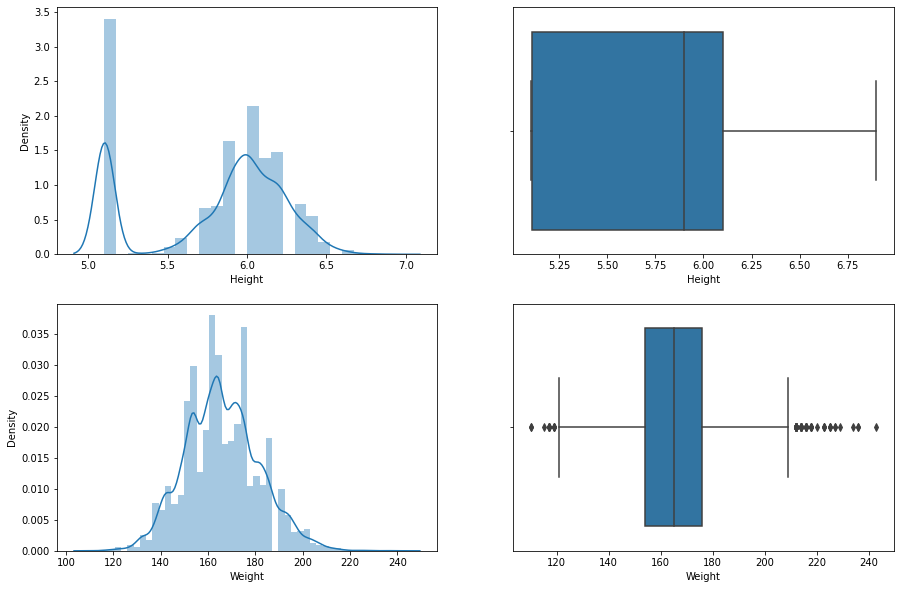

In [63]:
# Missing values filled with mean(average) value
for i in col:
    df = df.astype({ i : float})
    df.fillna(np.mean(df[i]))

# Converting height format to xx.xx
df["Height"] = df["Height"].str.replace("'", ".")
df["Height"] = df["Height"].astype({"Height" : 'float'})
df.style.format( {"Height" : "{2.2f}"} )
# Fill nan value with Mode
df["Height"] = df["Height"].fillna( stat.mode(df["Height"]) )


# Converting weight format to xx
df["Weight"] = df["Weight"].str.replace("lbs", "")
df["Weight"] = df["Weight"].astype({"Weight" : 'float'})
# Fill nan value with Mode
df["Weight"] = df["Weight"].fillna( stat.mode(df["Weight"]) )


# Univariate analysis to find outlier in height and weight
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df['Height'])
plt.subplot(2,2,2)
sns.boxplot(df['Height'], fliersize=5)
plt.subplot(2,2,3)
sns.distplot(df['Weight'])
plt.subplot(2,2,4)
sns.boxplot(df['Weight'], fliersize=5)
plt.grid(False)
plt.show()

1. **Summarise your findings from the visual**

    After analysis, we could see that there is no outlier in Height data; however, there are outliers in Weight data when both are analysed individually. 

2. **The reason for selecting the chart type you did.**
   
   We chose density graph and box plot for finding outlier for Height and Weight. This is because we need to do univariate analysis for finding outlier from data of Weight and Height. Also, Box Plot is a type of graph that helps to visualize the five-number summary and gives an idea about the spread of the data along with outlier outside of the whisker. The density graph is used to observe the distribution of the variable(Weight and Height) in a dataset. It plots the graph on a continuous interval or time-period.
   
3. **Mention the pre-attentive attributes used.(atleast 2)**

   - Color/Hue
   - Line Length
   - Spatial Position
   
4. **Mention the gestalt principles used.(atleast 2)**

   - Law of Figure
   - Law of Enclosure
   - Law of Prägnanz(Simplicity)

### Question 2
<h4>Do Bi-Variate anlaysis for outliers detection for height and weight 
<br><br>
<h4>Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

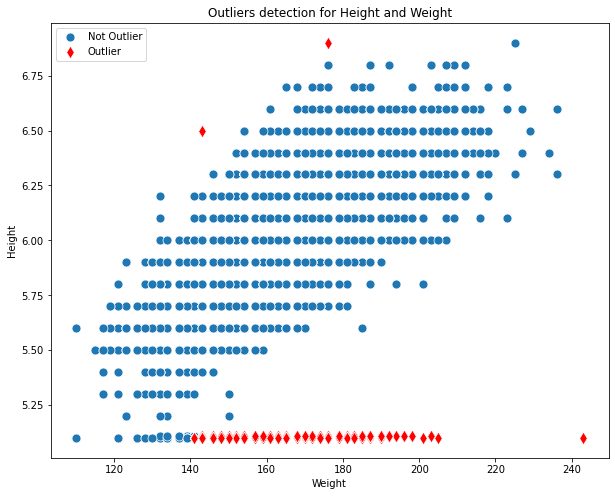

In [64]:
#assigning a palette
p = sns.color_palette("flare", as_cmap=True)

plt.figure(figsize=(10,8))

df_wei_hei = df[["Weight","Height"]].dropna()
df_wei_hei.reset_index(inplace = True, drop = True)

from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope(contamination=0.249)
result = ee.fit_predict(df_wei_hei)

result = pd.DataFrame(result)
result.columns = ["result"]
df_wei_hei = pd.concat( [ df_wei_hei, result ] , axis = 1)
df_outliers = df_wei_hei[ df_wei_hei["result"] == -1 ]
df_not_outlier = df_wei_hei[ df_wei_hei["result"] != -1 ]

ax1 = sns.scatterplot(
                x=df_not_outlier["Weight"], 
                y=df_not_outlier["Height"], 
                # color = "#3066f0",
                label="Not Outlier",
                s=80,
                # alpha=0.4,
            )
ax1 = sns.scatterplot(
                x=df_outliers["Weight"], 
                y=df_outliers["Height"], 
                color = "red",
                marker="d",
                s=80,
                # alpha=0.4,
                label="Outlier",
                ax = ax1,
            )
plt.title("Outliers detection for Height and Weight")
plt.legend()
plt.grid(False)
plt.show()

1. **Summarise your findings from the visual**

    We can observe here that when Weight of a player increases, then Height of the player also increases. It has positive correlation between them. However, there are some outlier as well, which are highlighted in red colour and shaped as diamond. Data points which are not outlier are in blue color and are in round shape.

2. **The reason for selecting the chart type you did.**
   
   We selected scatter plot because the question requires the bi-variate analysis and scatter plot is equipped to do similar analysis. Scatter plot helps to determine whether or not two variables have a relationship or correlation. Plotting a scatter plot with data points can help you to determine whether there's a potential relationship between them or not.
   
3. **Mention the pre-attentive attributes used.(atleast 2)**

   - Color/Hue
   - Shape
   - Spatial Position
   
4. **Mention the gestalt principles used.(atleast 2)**

   - Law of Figure
   - Law of Similarity
   - Law of Prägnanz(Simplicity)

### Question 3
<h4>What kind of co-relation exists between Age and Overall.
<br><br>    
Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did.</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

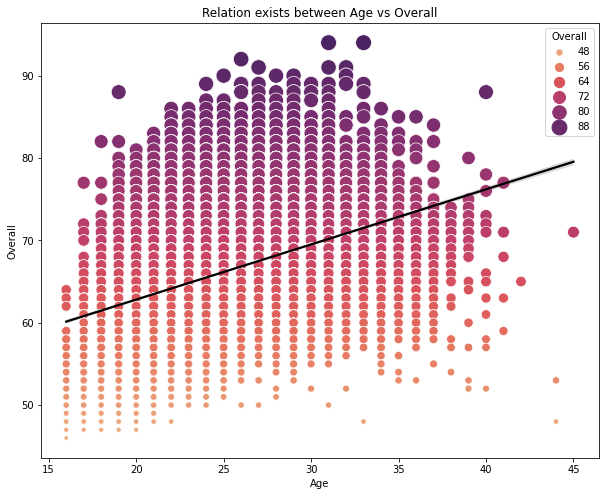

In [65]:
plt.figure(figsize=(10,8))
sns.regplot(
            x=df["Age"], 
            y=df["Overall"], 
            scatter_kws={'s':1},
            color="black",
            #lowess=True,
)
sns.scatterplot(
                x=df["Age"], 
                y=df["Overall"], 
                hue=df["Overall"], 
                size=df["Overall"], 
                sizes=(20, 250),
                palette = p,
)
plt.title('Relation exists between Age vs Overall')
plt.grid(False)
plt.show()

1. **Summarise your findings from the visual**

    We can observe here that when Age of a player increases, then Overall of the player also increases. It has positive correlation between them.

2. **The reason for selecting the chart type you did.**
   
   We selected scatter plot because the question requires the bi-variate analysis and scatter plot is equipped to do similar analysis. Scatter plot helps to determine whether or not two variables have a relationship or correlation. Plotting a scatter plot with data points can help you to determine whether there's a potential relationship between them or not.
   
3. **Mention the pre-attentive attributes used.(atleast 2)**

   - Color/Hue
   - Size
   - Spatial Position
   
4. **Mention the gestalt principles used.(atleast 2)**

   - Law of Figure
   - Law of Similarity
   - Law of Prägnanz(Simplicity)

  ### Question 4
<h4>What kind of relation exists between Age and (potential vs Overall). Create an appropriate visual to compare potential vs Overall with respect to age in one single visual.
<br><br>
Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual.</li>
    <li>The reason for selecting the chart type you did.</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

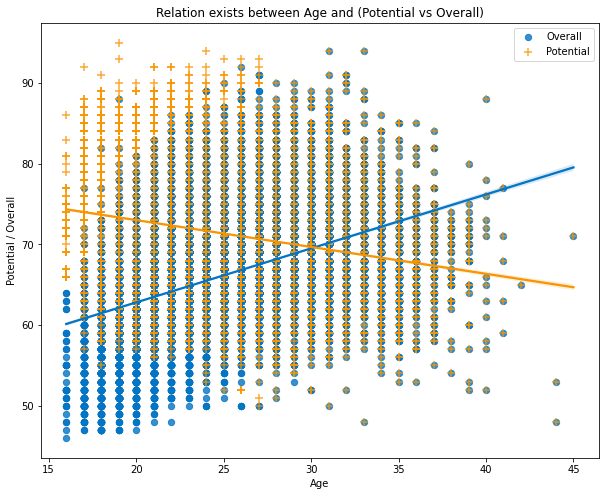

In [66]:
plt.figure(figsize=(10,8))
ax = sns.regplot(
            x=df["Age"], 
            y=df["Overall"], 
            color="#0474c4",
            marker='o',
            scatter_kws={'s':40},
            label='Overall',
            #lowess=True
)
ax = sns.regplot(
            x=df["Age"], 
            y=df["Potential"], 
            color="#f79502",
            marker='+',
            ax = ax,
            label='Potential',
            #lowess=True,
            scatter_kws={'s':50},
)
# ax.axis('equal')
ax.legend()
# plt.xlim([0, 60])
# plt.ylim([0, 100])

ax.legend(loc='upper right')
plt.ylabel("Potential / Overall")
plt.title('Relation exists between Age and (Potential vs Overall)')
plt.grid(False)
plt.show()

1. **Summarise your findings from the visual**

    **Age vs Overall**
    - We can observe that when the Age of the player increases, the Overall of the player also increases. It has positive correlation between each other; which can be evident by the regression line(blue colored) in the scatter plot.

    **Age vs Potential**
    - We can observe that when the Age of the player increases, the Potential of the player descreases. It has negative correlation between each other; which is shown by the regression line(orange colored) in the scatter plot.

2. **The reason for selecting the chart type you did.**
   
   We selected scatter plot because the question requires the multi-variate analysis and scatter plot is equipped to do similar analysis. Scatter plot helps to determine whether or not two or more variables have a relationship or correlation. Plotting a scatter plot with data points can help you to determine whether there's a potential relationship between them or not.
   
3. **Mention the pre-attentive attributes used.(atleast 2)**

   - Color
   - Spatial Position
   - Shape

4. **Mention the gestalt principles used.(atleast 2)**

   - Law of Similarity
   - Law of Figure
   - Law of Prägnanz(Simplicity)

  ### Question 5
<h4>What kind of relation exists between Player Vision and Player Value. Create an appropriate visual to show any kind of relation that exists between Vision and Value of the player in one single visual.
<br><br>
Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did.</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

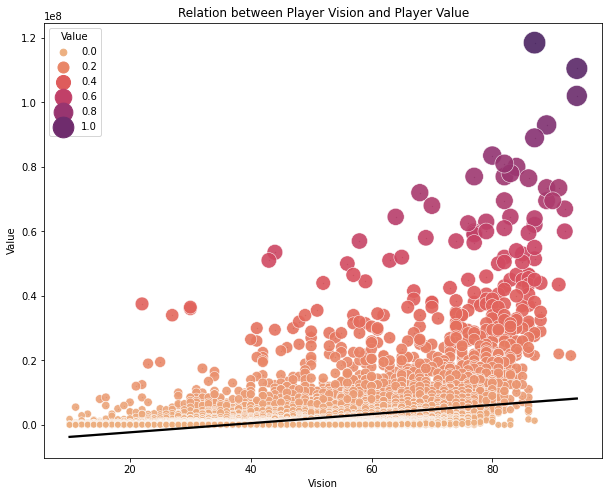

In [67]:
plt.figure(figsize=(10,8))
sns.regplot(
            x=df["Vision"], 
            y=df["Value"], 
            color="black",
            scatter_kws={'s':.1},
            #lowess=True
)
sns.scatterplot(
                x=df["Vision"], 
                y=df["Value"], 
                hue=df["Value"], 
                size=df["Value"], 
                sizes=(45, 500),
                palette=p,
                alpha=0.9
)
plt.title("Relation between Player Vision and Player Value")
plt.grid(False)
plt.show()

1. **Summarise your findings from the visual**

    Player's Value has a positive relation with Player's Vision. As the Vision of players increases, we can see there is an increase in their Value. Therefore, we can say that Player's Vision and Value has positive corelation as conveyed by the regression line.

2. **The reason for selecting the chart type you did.**
   
   We selected scatter plot because the question requires the bi-variate analysis and scatter plot is equipped to do similar analysis. Scatter plot helps to determine whether or not two variables have a relationship or correlation. Plotting a scatter plot with data points can help you to determine whether there's a potential relationship between them or not.
   
3. **Mention the pre-attentive attributes used.(atleast 2)**

   - Color/Hue
   - Size
   - Spatial Position
   
4. **Mention the gestalt principles used.(atleast 2)**

   - Law of Figure
   - Law of Similarity
   - Law of Prägnanz(Simplicity)

# Group's choice-2 Marks
 
#### Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual.
 
 1. Write the question in a markdown cell
 2. Below the question, in a coding cell, write the python code to create the visual to answer the question  

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   2.The reason for selecting the chart type you did <br>
   3.Mention the pre-attentive attributes used.(atleast 2)<br>
   4.Mention the gestalt principles used.(atleast 2)<br>

### Question

What is the relation between Age and Value of the player?

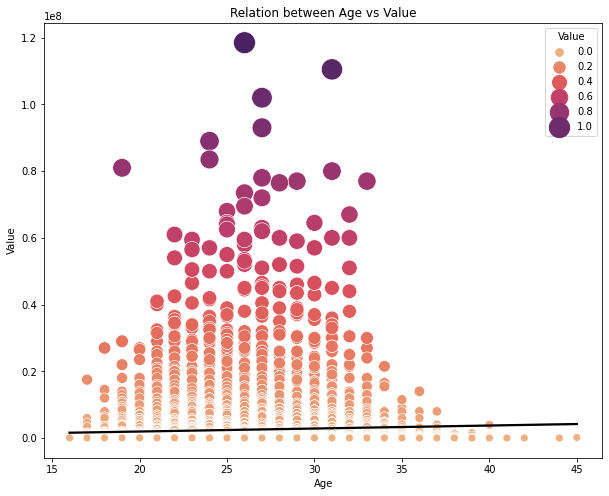

In [68]:
plt.figure(figsize=(10,8))
sns.regplot(
            x=df["Age"], 
            y=df["Value"], 
            scatter_kws={'s':1},
            color="black",
            #lowess=True,
)
sns.scatterplot(
                x=df["Age"], 
                y=df["Value"], 
                hue=df["Value"], 
                size=df["Value"], 
                sizes=(60, 480),
                palette = p,
)
plt.title('Relation between Age vs Value')
plt.grid(False)
plt.show()

1. **Summarise your findings from the visual**

    The Value of the player and Age of the player have no or very little corelation between them. We can see that Value of the player of maximum when their Age is between 18 years and 34 years. This Age duration(18-34 years) is evident from the plot for bring greater Value for the player than any other Age segment.

2. **The reason for selecting the chart type you did.**
   
   We selected scatter plot because the question requires the bi-variate analysis and scatter plot is equipped to do similar analysis. Scatter plot helps to determine whether or not two variables have a relationship or correlation. Plotting a scatter plot with data points can help you to determine whether there's a potential relationship between them or not.
   
3. **Mention the pre-attentive attributes used.(atleast 2)**

   - Color/Hue
   - Size
   - Spatial Position
   
4. **Mention the gestalt principles used.(atleast 2)**

   - Law of Figure
   - Law of Similarity
   - Law of Prägnanz(Simplicity)

<h3>Objective</h3>
<h4>To find best players from each positions with their age, nationality, club based on their Potential Scores</h4>

In [69]:
df_object = df[ ["Name", "Age", "Position", "Nationality", "Club", "Potential"] ]
position = df_object["Position"].unique()


df_subset = pd.DataFrame( columns=["Name", "Age", "Position", "Nationality", "Club", "Potential"] )
for i in position:
    df_subset = df_subset.append( df_object[ df_object["Position"] == str(i)].head(1) ).sort_values("Position")


df_subset.reset_index(inplace = True, drop=True)
df_subset

,Name,Age,Position,Nationality,Club,Potential
0,A. Griezmann,27.0,CAM,France,Atlético Madrid,90.0
1,D. Godín,32.0,CB,Uruguay,Atlético Madrid,90.0
2,Sergio Busquets,29.0,CDM,Spain,FC Barcelona,89.0
3,Luis Alberto,25.0,CF,Spain,Lazio,85.0
4,Thiago,27.0,CM,Spain,FC Bayern München,86.0
5,De Gea,27.0,GK,Spain,Manchester United,93.0
6,J. Rodríguez,26.0,LAM,Colombia,FC Bayern München,89.0
7,Marcelo,30.0,LB,Brazil,Real Madrid,88.0
8,G. Chiellini,33.0,LCB,Italy,Juventus,89.0
9,T. Kroos,28.0,LCM,Germany,Real Madrid,90.0


In [70]:
df_subset = df_subset.sort_values("Potential")

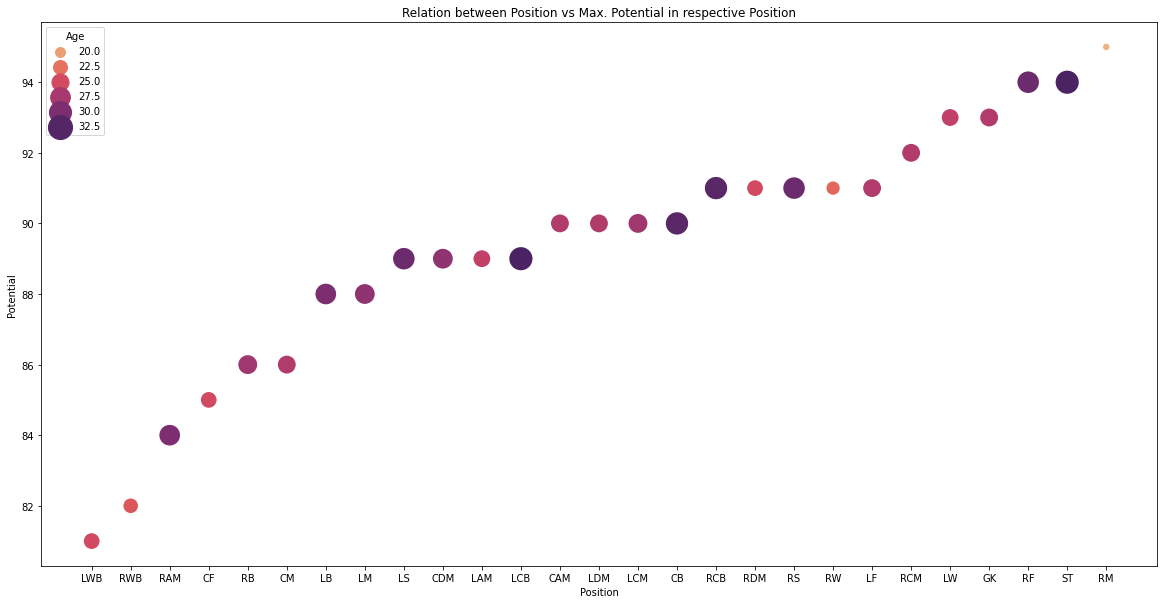

In [71]:
plt.figure(figsize=(20,10))
sns.scatterplot(
                x=df_subset["Position"], 
                y=df_subset["Potential"], 
                hue=df_subset["Age"], 
                size=df_subset["Age"], 
                sizes=(60, 600),
                palette = p,
)
plt.title('Relation between Position vs Max. Potential in respective Position')
plt.grid(False)
plt.show()

1. **Summarise your findings from the visual**

    The Position of the player and Potential of the player with respect to player's age is represented in above graph. We can observe here that for RM position player with age around 20 years and have high potential of 95. And, for LWB position player with age around 25 years and have high potential of 81.

2. **The reason for selecting the chart type you did.**
   
   We selected scatter plot because the question requires the bi-variate analysis and scatter plot is equipped to do similar analysis. Plotting a scatter plot with data points can help you to determine whether there's a potential relationship between them or not.
   
3. **Mention the pre-attentive attributes used.(atleast 2)**

   - Color/Hue
   - Size
   - Spatial Position
   
4. **Mention the gestalt principles used.(atleast 2)**

   - Law of Figure
   - Law of Similarity
   - Law of Prägnanz(Simplicity)

<h1><center> ************ END OF ASSIGNMENT ****************</center></h1>